In [1]:
data_dir <- "/data/projects/dschaub/ANCA-GN_transcriptomics/data/single-cell/exploratory"
working_dir <- "/data/projects/dschaub/ANCA-GN_transcriptomics"

In [2]:
setwd(working_dir)

RhpcBLASctl::blas_set_num_threads(1)
library(Seurat)
library(dplyr)
# library(tidyverse)
library(here)
# library(readxl)
# library(Matrix)
library(IMSBSeuratHelpers)
library(harmony)
library(ggplot2)
# library(sctransform)
library(future)
library(data.table)
library(xlsx)
plan("multicore", workers = 1)
options(future.globals.maxSize = 20 * 1000 * 1024^2) # 20GB
options(repr.matrix.max.rows = 600, repr.matrix.max.cols = 200)

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


here() starts at /data/projects/dschaub/ANCA-GN_transcriptomics

Loading required package: Rcpp


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




## Load data

In [3]:
path <- paste0(data_dir, "/ANCA_exploratory_27PK27PB_Tcells_processed_R")
raw_data <- Read10X(data.dir = path)
metadata <- read.csv(paste0(path, "/metadata.csv"), row.names = 1)
seu <- CreateSeuratObject(counts = raw_data, project = "ANCA", meta.data = metadata)

In [4]:
# Extract the counts matrix
counts_matrix <- seu@assays$RNA@counts

# Check if all values in the counts matrix are integers
are_counts_integers <- all(counts_matrix == round(counts_matrix))

In [5]:
are_counts_integers

[1] TRUE

## Harmony integration pipeline

In [6]:
seu <- NormalizeData(seu)

In [7]:
Idents(seu) <- "patient"

In [8]:
seu <- FindVariableFeatures(
    object = seu,
    selection.method = "vst",
    nfeatures = 2000
)

In [9]:
seu <- ScaleData(
    seu
    # , vars.to.regress =c("nFeature_RNA","nCount_RNA","frac.mito")
)

Centering and scaling data matrix



In [10]:
seu <- RunPCA(
    object = seu,
    features = VariableFeatures(object = seu),
    verbose = T
)

PC_ 1 
Positive:  RACK1, SARAF, ATP5F1E, EEF1G, NOP53, MT-ND4L, TLE5, FYB1, MT-ATP8, SNHG29 
	   LIME1, NME2, TRBC2, IFITM1, PCED1B-AS1, GAS5, SEPTIN7, SEPTIN9, RIPOR2, PLAAT4 
	   SNHG6, RESF1, RPS17, SEPTIN1, FCMR, LINC01578, ADGRE5, MYH9, RSRP1, PAXX 
Negative:  GNB2L1, ATP5E, ATP5L, TMEM66, GLTSCR2, ATP5G2, UQCR11.1, RPSAP58, TCEB2, C14orf2 
	   ATP5I, C19orf43, USMG5, NBEAL1, RPL27A, ATP5J2, ATP5O, ATP5D, RPL13A, ATP5J 
	   ATP5G3, NDUFB8.1, SELK, FYB, ATPIF1, NHP2L1, ATP5A1, MYEOV2, SEP15, ATP5B 
PC_ 2 
Positive:  RPS8, RPS12, LTB, EEF1A1, RPS6, EEF1B2, MAL, RPLP0, LEF1, CCR7 
	   TXNIP, TPT1, TCF7, NOSIP, SELL, MYC, IL7R, RPL7, PRKCQ-AS1, GAS5 
	   RPL21, RPL31, SNHG29, EEF1G, CISH, EEF2, RPL13A, ADTRP, ACTN1, AQP3 
Negative:  SRGN, GZMA, CST7, CCL4, CCL5, DUSP2, NR4A2, NKG7, PRF1, TNFAIP3 
	   ZFP36, CTSW, GZMH, HLA-B, GZMB, CREM, CD74, KLRD1, DUSP1, ZEB2 
	   FOSB, TENT5C, IL2RB, REL, FOS, AOAH, HLA-DPA1, GNG2, PTGER4, ZFP36L2 
PC_ 3 
Positive:  RGCC, NR4A2, JUNB, TNFAIP3, FOS

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony 9/10

Harmony 10/10

Harmony converged after 10 iterations

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


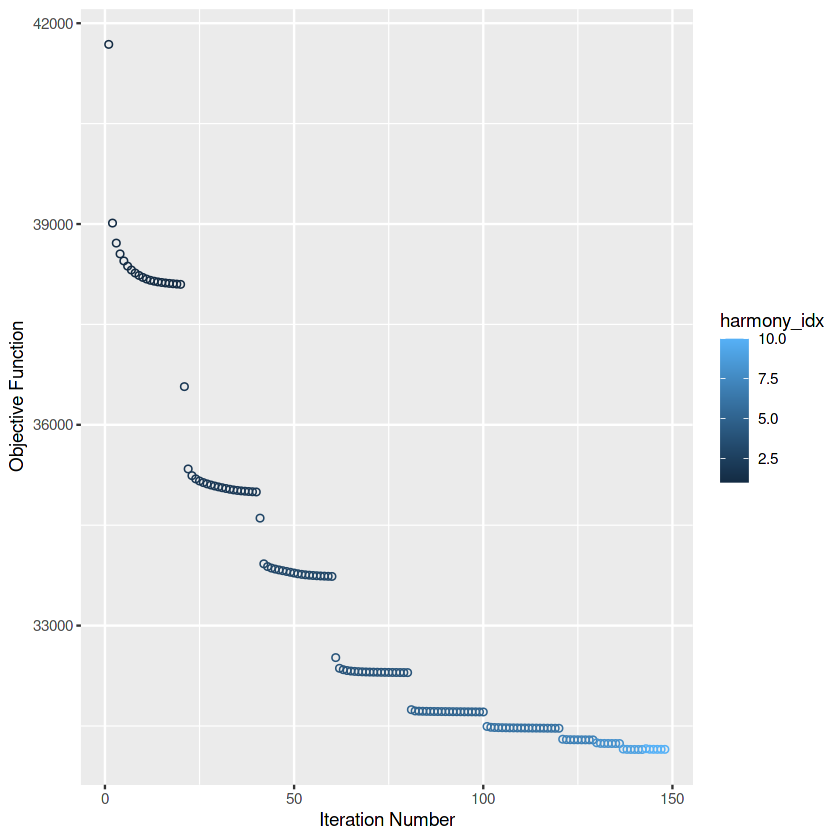

In [11]:
seu <- seu %>%
    RunHarmony("patient",
        dims.use = 1:30,
        plot_convergence = TRUE
    )

In [12]:
seu <- RunUMAP(object = seu, reduction = "harmony", dims = 1:30)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
15:23:30 UMAP embedding parameters a = 0.9922 b = 1.112

15:23:30 Read 72416 rows and found 30 numeric columns

15:23:30 Using Annoy for neighbor search, n_neighbors = 30

15:23:30 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|



15:23:40 Writing NN index file to temp file /tmp/RtmpiwrJaS/file1c6d1b424e6602

15:23:40 Searching Annoy index using 1 thread, search_k = 3000

15:24:13 Annoy recall = 100%

15:24:15 Commencing smooth kNN distance calibration using 1 thread

15:24:17 Initializing from normalized Laplacian + noise

15:24:20 Commencing optimization for 200 epochs, with 3404642 positive edges

15:24:52 Optimization finished



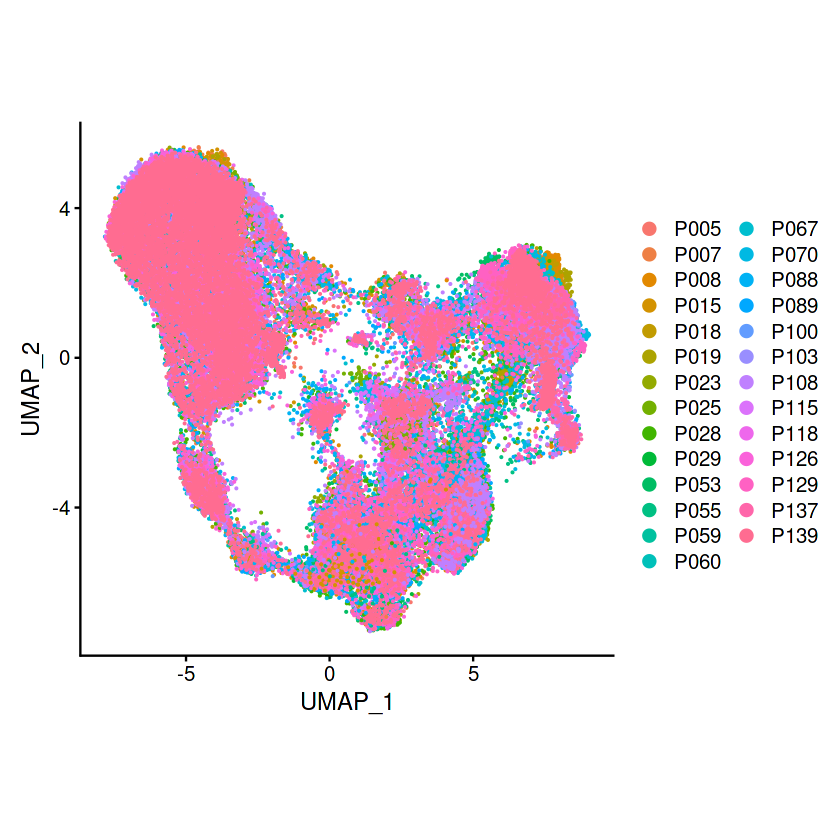

In [13]:
DimPlot(
    object = seu, reduction = "umap", label = F,
    pt.size = 0.1
) + theme(aspect.ratio = 1)

## Save results

In [41]:
save_dir <- paste0(data_dir, "/ANCA_exploratory_27PK27PB_Tcells_HarmonyR")
# create save dir
dir.create(save_dir, showWarnings = FALSE)

In [42]:
metadata <- seu[[]]
save_path <- paste0(save_dir, "/metadata.csv")
write.csv(metadata, file = save_path, row.names = TRUE)

In [43]:
harmony_embeddings <- seu[["harmony"]]@cell.embeddings
umap_embeddings <- seu[["umap"]]@cell.embeddings

# Write the Harmony embeddings to a CSV file
write.csv(harmony_embeddings, file = paste0(save_dir, "/harmony_embeddings.csv"), row.names = TRUE)
write.csv(umap_embeddings, paste0(save_dir, "/umap_embeddings.csv"))